# maysics.utils模块使用说明

utils模块包含十三个函数：

|名称|作用|
|---|---|
|grid_net|生成网格点|
|group|分组处理数据|
|e_distance|欧氏距离|
|e_distances|欧氏距离|
|earth_distance|已知经纬度求距离|
|earth_distances|已知经纬度求距离|
|m_distance|马氏距离|
|m_distances|马氏距离|
|discrete|绘制离散函数|
|circle|绘制圆|
|hermit|厄米共轭|
|mat_exp|矩阵的exp运算|

utils模块包含一个类：

|名称|作用|
|---|---|
|A_P|幅-频和相-频分析|

<br></br>
## 网格点：grid_net
grid_net(*args)

### 功能说明
可以直接从maysics中调用

### DEMO 1-1：生成网格点 

In [1]:
import maysics as ms

ms.grid_net([1, 2], [3, 4])

array([[1, 3],
       [2, 3],
       [1, 4],
       [2, 4]])

<br></br>
## 分组处理数据：group
group(data, index, f, param={})
<br>```data```：二维ndarray，数据
<br>```index```：整型，需要分组处理的列索引
<br>```f```：函数类型，将分组后的每个部分的二维ndarray作为输入
<br>```param```：字典类型，用于传递f中的其他参数

### DEMO 2-1：将下列数据分组按第一列分组处理，使每一组的数据均值为0

In [2]:
import maysics as ms

data = np.array([['太阳', 2, 3],
                 ['太阳', 5, 4],
                 ['月亮', 1, 0],
                 ['月亮', 8, 9]], dtype=object)

def f(data):
    data[:, 1:] -= data[:, 1:].mean(axis=0)
    return data

ms.utils.group(data, 0, f)

array([['太阳', -1.5, -0.5],
       ['太阳', 1.5, 0.5],
       ['月亮', -3.5, -4.5],
       ['月亮', 3.5, 4.5]], dtype=object)

<br></br>
## 欧氏距离：e_distance和e_distances
e_distance(p1, p2)
<br>```p1```：一维数组，第一个点的位置
<br>```p2```：一维数组，第二个点的位置

e_distances(data, des='o')
<br>```data```：一维或二维列表，数据
<br>```des```：字符串或一维数组，可选'o'或'O'(原点)、'mean'(均值点)及自定义数组，目标点坐标

### 功能说明
求点与点之间的欧式距离
<br>```e_distance```是求解两个点之间的欧式距离
<br>```e_distances```是求解多个点到目标点之间的欧式距离，目标点默认为坐标原点

### DEMO 3-1：求点(1, 1)到点(3, 3)的欧式距离

In [3]:
import maysics as ms

ms.utils.e_distance([1, 1], [3, 3])

2.8284271247461903

### DEMO 3-2：求点集{(1, 1), (1, 2), (2, 2), (2, 3)}到点(1, 0)的欧式距离

In [4]:
import maysics as ms

X = [[1, 1],
     [1, 2],
     [2, 2],
     [2, 3]]
ms.utils.e_distances(X, (1, 0))

array([1.        , 2.        , 2.23606798, 3.16227766])

### DEMO 3-3：求点集{(1, 1), (1, 2), (2, 2), (2, 3)}到其中心的欧式距离

In [5]:
import maysics as ms

X = [[1, 1],
     [1, 2],
     [2, 2],
     [2, 3]]
ms.utils.e_distances(X, 'mean')

array([1.11803399, 0.5       , 0.5       , 1.11803399])

<br></br>
## 已知经纬度求距离：earth_distance和earth_distances
earth_distance(lon_lat_1, lon_lat_2)
<br>```lon_lat_1```：一维数组，第一个点的经度、纬度
<br>```lon_lat_2```：一维数组，第二个点的经度、纬度
<br></br>
earth_distances(lon_lat, des)
<br>```lon_lat```：一维或二维数组，经度、纬度
<br>```des```：一维数组，目标点经度、纬度

### 功能说明
距离公式为：$d=Rcos\phi_{1}cos\phi_{2}cos(\theta_{1}-\theta_{2})+sin\theta_{1}sin\theta_{2}$
<br>其中，R为地球半径，$\theta$为经度，$\phi$为纬度
<br>```e_distance```是求解两个点之间的距离
<br>```e_distances```是求解多个点到目标点之间的距离

### DEMO 4-1：求经纬度为(0°W, 0°N)的点到经纬度为(0.1°W, 51.5°W)的距离

In [6]:
import maysics as ms

ms.utils.earth_distance([0, 0], [0.1, 51.5])

5726899.687161521

### DEMO 4-2：求经纬度为{(0°W, 0°N), (1°W, 5°N), (3°E, 5°S)}的点集到经纬度为(0.1°W, 51.5°W)的距离

In [7]:
import maysics as ms

X = [[0, 0],
     [1, 5],
     [-3, -5]]
ms.utils.earth_distance(X, [0.1, 51.5])

array([5615698.01005612, 5170891.33557871])

<br></br>
## 马氏距离：m_distance和m_distances
m_distance(data, p1, p2)
<br>```data```：二维列表，数据
<br>```p1```：一维或二维数组，第一个点的位置
<br>```p2```：一维或二维数组，第二个点的位置

m_distances(data, des='o')
<br>```data```：二维数组，数据
<br>```des```：字符串或一维或二维数组，可选'o'或'O'(原点)、'mean'(均值点)及自定义数组，目标点坐标

### 功能说明
求点与点之间的马式距离，马氏距离需要以某个点集为基础
<br>```m_distance```是求解两个点之间的马式距离
<br>```m_distances```是求解多个点到目标点之间的马式距离，目标点默认为坐标原点

### DEMO 5-1：在点集{(1, 1), (1, 2), (2, 2), (2, 3)}的基础上，求点(1, 1)到点(3, 3)的马式距离

In [8]:
import maysics as ms

X = [[1, 1],
     [1, 2],
     [2, 2],
     [2, 3]]
ms.utils.m_distance(X, (1, 1), (3,3))

3.4641016151377544

### DEMO 5-2：在点集{(1, 1), (1, 2), (2, 2), (2, 3)}的基础上，求该点集到点(1, 0)的马式距离

In [9]:
import maysics as ms

X = [[1, 1],
     [1, 2],
     [2, 2],
     [2, 3]]
ms.utils.m_distances(X, (1, 0))

array([1.73205081, 3.46410162, 2.44948974, 3.87298335])

### DEMO 5-3：在点集{(1, 1), (1, 2), (2, 2), (2, 3)}的基础上，求该点集到中心的马式距离

In [10]:
import maysics as ms

X = [[1, 1],
     [1, 2],
     [2, 2],
     [2, 3]]
ms.utils.m_distances(X, 'mean')

array([1.22474487, 1.22474487, 1.22474487, 1.22474487])

<br></br>
## 绘制离散函数图像：discrete
discrete(x, y, color=None, label=None)
<br>```x```：一维数组类型，自变量
<br>```y```：一维数组类型，因变量
<br>```color```：字符串类型，颜色
<br>```label```：字符串类型，标签

### 功能说明
可以直接从maysics中调用

### DEMO 6-1：绘制$sin(\frac{\pi}{8}n)$，$n\in Z$的图像

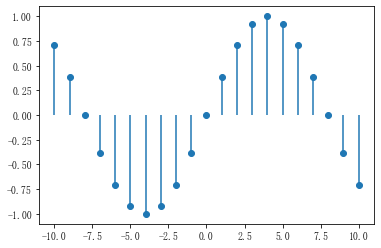

In [11]:
import maysics as ms
import numpy as np

n = np.arange(-10, 11, 1)
y = np.sin(n * np.pi / 8)
ms.discrete(n, y)

<br></br>
## 绘制圆：circle
circle(center=(0, 0), radius=1, angle_range=(0, 2*np.pi), acc=0.01, c=None, label=None)
<br>```circle```：元组类型，圆心坐标
<br>```radius```：数类型，圆半径
<br>```angle_range```：元组类型，绘制的角度范围
<br>```acc```浮点数类型，绘图精度
<br>```c```：字符串类型，颜色
<br>```label```：字符串类型，图例

### 功能说明
可以直接从maysics中调用

### DEMO 7-1：绘制$(x-1)^{2}+(y-2)^{2}=9$的$\frac{1}{4}$圆的图像

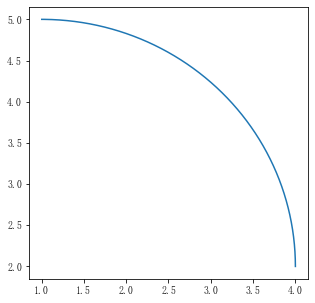

In [12]:
import maysics as ms
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(5, 5))
ms.circle((1,2), 3, (0, np.pi/2))

<br></br>
## 厄米矩阵：hermit
hermit(data)
<br>```data```：二维数组

### 功能说明
可以直接从maysics中调用

### DEMO 8-1：求矩阵m的厄米矩阵

In [13]:
import maysics as ms

m = [[1 + 1j, 2 + 2j],
     [3 + 3j, 4 + 4j]]

ms.hermit(m)

array([[1.-1.j, 3.-3.j],
       [2.-2.j, 4.-4.j]])

<br></br>
## 矩阵的exp运算：mat_exp
mat_exp(data, tol=0.01)
<br>```data```：二维数组，矩阵
<br>```tol```：浮点数类型，误差，当$\frac{data^{n}}{n!}$的每个矩阵元均小于tol时输出结果

### 功能说明与原理
可以直接从maysics中调用
<br>运用
$$
e^{X}=\Sigma \frac{X^{n}}{n!}
$$
对结果进行逼近，定义矩阵
$$
\Delta = \frac{X^{n}}{n!}-\frac{X^{n-1}}{(n-1)!}
$$
当$\Delta$中的每一矩阵元均小于```tol```时，输出矩阵

### DEMO 9-1：计算$e^{X}$，其中，$M=\left( \begin{array}{cc} 0.1 & 0.2 \\0.3 & 0.4 \end{array} \right)$

In [14]:
import maysics as ms

ms.mat_exp([[0.1, 0.2],
            [0.3, 0.4]])

array([[1.14199583, 0.26020833],
       [0.3903125 , 1.53230833]])

<br></br>
## 幅-频分析和相-频分析：A_P
A_P(X)
<br>```X```：函数或一维数组形式，信号的频域表示

### A_P的方法
A_P下设三个可调用方法```fit```、```show```、```savefig```
<br>fit(f, param={})
<br>```f```：函数或一维数组形式，频率
<br>```param```：字典类型，可选，用于传递f中的其他参数，仅当f为函数类型时有效，默认为空字典

show(image_type='c')
<br>savefig(filename, image_type='c')
<br>```filename```：字符串形式，文件名
<br>```image_type```：字符串形式，可选'C'和'D'，'C'表示绘制连续图像，'D'表示绘制离散图像

### DEMO 10-1：绘制连续函数

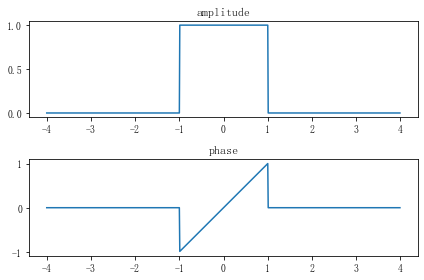

In [15]:
from maysics.utils import A_P
import numpy as np

def H(f):
    y = f
    x = y[abs(y) <= 1]
    y[abs(y) <= 1] = np.e**(1j*x)
    y[abs(y) > 1] = 0
    return y


ap = A_P(H)
f = np.arange(-4, 4, 0.01)
ap.fit(f)
ap.show()

### DEMO 10-2：绘制离散函数

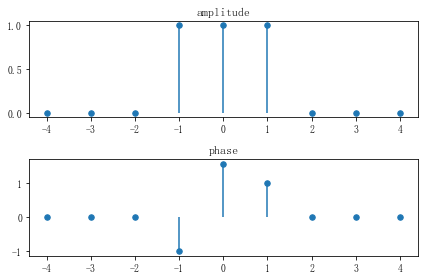

In [16]:
from maysics.utils import A_P
import numpy as np

def H(f):
    y = f
    x = y[abs(y) <= 1]
    y[abs(y) <= 1] = np.e**(1j*x)
    y[abs(y) > 1] = 0
    return y

ap = A_P(H)
f = np.arange(-4, 5, 1)
ap.fit(f)
ap.show('d')